Name:-Ronak Siddhpura

Roll no:-22BCE540

Subject & Course code :- ML, 2CS501

#Practical 3 :
**Simple and Multiple Linear Regression using Gradient
Descent & Normal Equation Method (without using
sklearn or equivalent library for both)**



**Simple Linear Regression using batch gradient descent**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file="/content/Train.csv"
data=pd.read_csv(file)

In [ ]:
x_train=np.array(data.x)
y_train=np.array(data.y)
alpha=0.00001
theta0=0.0
theta1=0.0
m=len(x_train)
cost=[]

for i in range(1000):
  h_theta=theta0 + theta1 * x_train
  error=h_theta-y_train
  theta0=theta0 - alpha * np.mean(error)
  theta1=theta1 - alpha*np.mean(error * x_train)
  cost.append((1/(2*m))*(np.sum(error**2)))

print(theta0,theta1)



0.014658111760022933 0.9988297525354068


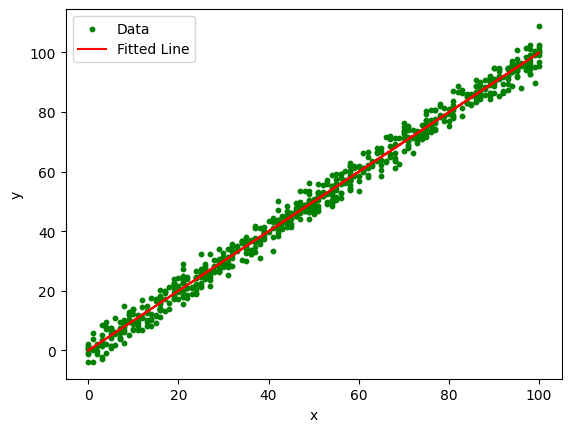

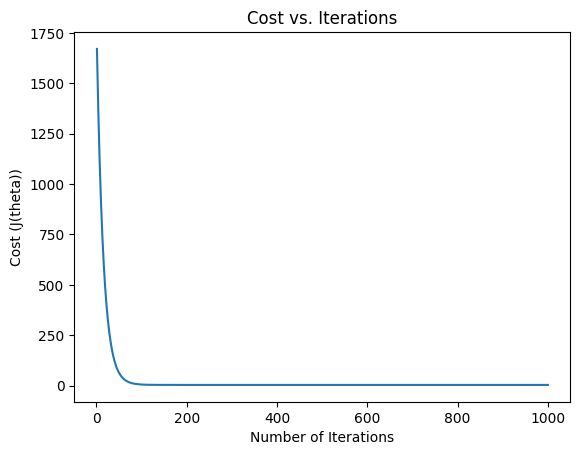

In [ ]:
plt.scatter(x_train, y_train, label='Data',s=10,color='green')
plt.plot(x_train, theta0 + theta1 * x_train, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Plot J(theta) (error) vs. number of iterations
iterations = np.arange(1, 1001)
plt.plot(iterations, cost)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J(theta))')
plt.title('Cost vs. Iterations')
plt.show()

**Multiple linear regression using stochastic gradient descent**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import the matplotlib library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data from CSV
data = pd.read_csv('BostonHousing.csv')

# Extract features and target variable
X = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']].values
y = data['medv'].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize coefficients
coefficients = np.random.randn(X_scaled.shape[1])

# Hyperparameters
learning_rate = 0.01
epochs=1000
# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(X_train.shape[0]):
        xi = X_train[i]
        yi = y_train[i]
        prediction = np.dot(xi, coefficients)
        error = prediction - yi
        gradient = 2 * np.dot(xi.T, error)
        coefficients -= learning_rate * gradient

# Make predictions on test data
predictions = np.dot(X_test, coefficients)

# Calculate Mean Squared Error
mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 26.043678560237286


**Multiple Linear Regression using Normal equation**

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv('BostonHousing.csv')

X = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_final = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

X_transpose_X = X_train_final.T.dot(X_train_final)
X_transpose_y = X_train_final.T.dot(y_train)
theta = np.linalg.inv(X_transpose_X).dot(X_transpose_y)

X_test_final = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_pred = X_test_final.dot(theta)

print("All the paramater's values: ")
print(theta,"\n")

output_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output_comparison)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

All the paramater's values: 
[22.79653465 -1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194
  3.14523956 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151
  1.12956831 -3.61165842] 

     Actual  Predicted
173    23.6  28.996724
274    32.4  36.025565
491    13.6  14.816944
72     22.8  25.031979
452    16.1  18.769880
..      ...        ...
412    17.9  -0.164237
436     9.6  13.684867
411    17.2  16.183597
86     22.5  22.276220
75     21.4  24.479024

[102 rows x 2 columns]
Mean Squared Error: 24.29
